# **Business Case: Yulu - Hypothesis Testing**
About Yulu

Yulu is India’s leading micro-mobility service provider, which offers unique vehicles for the daily
commute. Starting off as a mission to eliminate traffic congestion in India, Yulu provides the safest commute solution through a user-friendly mobile app to enable shared, solo, and sustainable commuting.

Yulu zones are located at all the appropriate locations (including metro stations, bus stands, office spaces, residential areas, corporate offices, etc) to make those first and last miles smooth, affordable, and convenient!

Yulu has recently suffered considerable dips in its revenues. They have contracted a consulting company to understand the factors on which the demand for these shared electric cycles depends. Specifically, they want to understand the factors affecting the demand for these shared electric cycles in the Indian market.






### Why this case study?

- From Yulu's Perspective:
    
    - Strategic Expansion: Yulu's decision to enter the Indian market is a strategic move to expand its global footprint. Understanding the demand factors in this new market is essential to tailor their services and strategies accordingly.
    - Revenue Recovery: Yulu's recent revenue decline is a pressing concern. By analyzing the factors affecting demand for shared electric cycles in the Indian market, they can make informed adjustments to regain profitability.
      
        
    

- From Learners' Perspective:  

    - Real-World Problem-Solving: It presents an opportunity to apply machine learning and data analysis techniques to address a real-world business problem.
    - Market Insights: Analyzing factors affecting demand in the Indian market equips learners with market research skills. This knowledge is transferable to various industries.
    - Consulting Skills: Learners can develop their ability to act as consultants, providing data-driven insights to organizations


------    


## Business Problem:

- Which variables are significant in predicting the demand for shared electric cycles in the Indian market ?
        
- How well those variables describe the electric cycle demands.


------
        
## 📃 Features of the dataset:

- Column Profiling:

| Feature | Description |
|:--------|:------------|
|datetime| datetime |  
|season| season (1: spring, 2: summer, 3: fall, 4: winter)|
|holiday| whether day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)|
|workingday| if day is neither weekend nor holiday is 1, otherwise is 0.|
|temp| temperature in Celsius|
|atemp| feeling temperature in Celsius|
|humidity| humidity|
|windspeed| wind speed|
|casual| count of casual users|
|registered| count of registered users|
|count - Total_riders| count of total rental bikes including both casual and registered|

- weather

|Category|Details|
|:------|:--------|
|1| Clear, Few clouds, partly cloudy, partly cloudy|
|2| Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist|
|3| Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds|
|4| Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog|

# ** Exploratory data analysis steps like checking the structure & characteristics of the dataset**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
from google.colab import files
uploaded = files.upload()

Saving yulu.csv to yulu (1).csv


In [ ]:
df= pd.read_csv('yulu.csv')
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


    Datatype of some attributes needs to be changed to proper datatypes

    • datetime – datetime

    • season – object

    • holiday – object

    • workingday – object

    • weather – object


In [ ]:
df['datetime'] = pd.to_datetime(df['datetime'])

cat_cols= ['season', 'holiday', 'workingday', 'weather']
for col in cat_cols:
    df[col] = df[col].astype('object')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  object        
 2   holiday     10886 non-null  object        
 3   workingday  10886 non-null  object        
 4   weather     10886 non-null  object        
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(4), object(4)
memory usage: 1020.7+ KB


In [ ]:
df.iloc[:, 1:].describe(include='all')

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.0,10886.0,10886.0,10886.0,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
unique,4.0,2.0,2.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,4.0,0.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,2734.0,10575.0,7412.0,7192.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,NaN,NaN,NaN,NaN,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,NaN,NaN,NaN,NaN,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,NaN,NaN,NaN,NaN,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,NaN,NaN,NaN,NaN,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,NaN,NaN,NaN,NaN,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000


In [ ]:
df.isnull().sum()

,0
datetime,0
season,0
holiday,0
workingday,0
weather,0
temp,0
atemp,0
humidity,0
windspeed,0
casual,0


•	There are no missing values in the dataset.

• Casual and registered attributes might have outliers because their mean and median are very far away to one another and the value of standard deviation is also high which tells us that there is high variance in the data of these attributes.


###**Relation between dependent and independent variables**

In [ ]:
# number of unique values in each categorical columns
df[cat_cols].melt().groupby(['variable', 'value'])['value'].count()

variable    value
holiday     0        10575
            1          311
season      1         2686
            2         2733
            3         2733
            4         2734
weather     1         7192
            2         2834
            3          859
            4            1
workingday  0         3474
            1         7412
Name: value, dtype: int64


•	From the above picture we can see that the count of bikes rented were more
  during working days and considerably less during holidays.

•	All the seasons had almost the same number of users renting bikes.

•	Most variation can be seen during the heavy rain(weather-4) where the rentals
  dropped. This can be considered an outlier.


<Axes: xlabel='workingday', ylabel='count'>

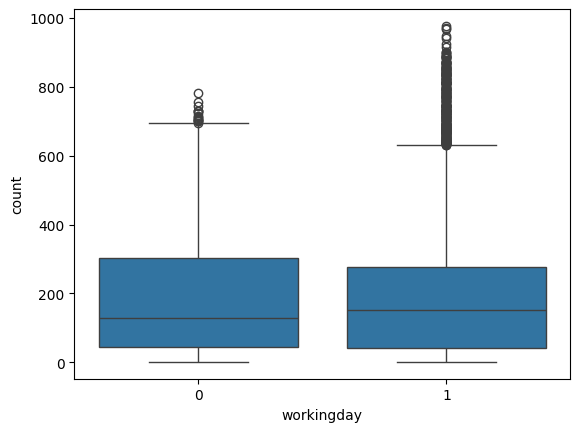

In [ ]:
sns.boxplot(x='workingday', y= 'count', data =df)

This is a boxplot to see the count of electric bikes rented on working(1) and non-working days(0).


*   The outliers on working days are more compared to non-working days.This mean there is a higher variability meaning there could a high demand for electric bikes on working days for commuting.

*   The median of working days is slightly more than non-working days but it is not enough to prove whether it is actually true on a larget sample of data. We would have to do an hypothesis testing to prove working days have more rentals than non-working days.



<Axes: xlabel='season', ylabel='count'>

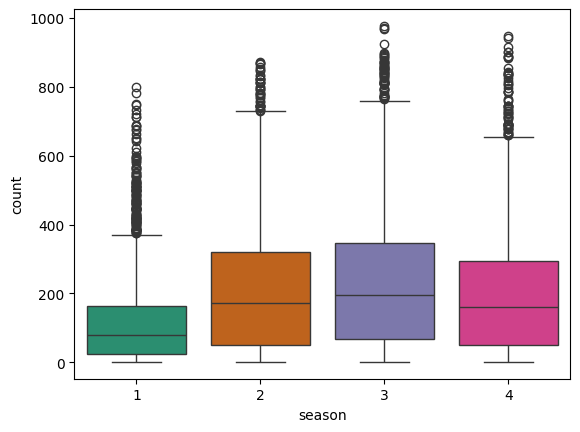

In [ ]:
sns.boxplot(x='season', y='count', data=df, palette='Dark2', hue='season', legend=False)

1-Spring  
2-Summer  
3-Fall  
4-Winter

* More bikes were rented during summer and fall maybe due to more stable and pleasant weather. Tourism also peaks during these times which could have increased the rentals.

*   Bike rentals was least during spring which could possibly be due to certain areas having rainfall and unstable weather conditions.


*   Winter also had lower bike rentals maybe because of the cold temperatures and considering its holiday season most prefer staying indoors.






<Axes: xlabel='weather', ylabel='count'>

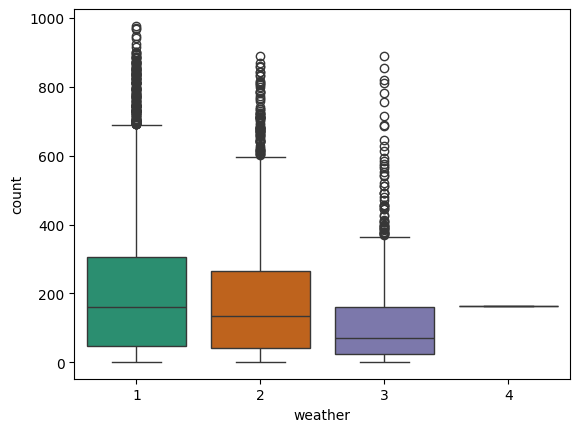

In [ ]:
sns.boxplot(x='weather', y= 'count', data =df,palette='Dark2',hue='weather',legend=False)

1: Clear, Few clouds, partly cloudy, partly cloudy  
2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist  
3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds  
4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog  

*   The count of bike rentals gradually decrease from clear skies to cloudy skies to slight rain and almost negligible sales can be seen during thunderstorms.
*   Clearly yulu suffers during rainy weathers since it is hard to commute with electric vehicles in these conditions.Thunderstorms lead to very low bike rentals due to safety concerns, poor road conditions, and discomfort from the severe weather.

*   Clear skies and cloudy weather offer the most favorable conditions for biking, with pleasant temperatures, good visibility, and no risk of rain, which results in the highest bike rentals






# **HYPOTHESIS TESTING :**

###**1. 2- Sample T-Test to check if Working Day has an effect on the number of electric cycles rented :**

    Null Hypothesis: Working day has no effect on the number of cycles being rented.

    Alternate Hypothesis: Working day has effect on the number of cycles being
    rented.
    Significance level (alpha): 0.05

We will use the 2-Sample T-Test to test the hypothess defined above

In [ ]:
df.groupby("workingday")['count'].describe()


,count,mean,std,min,25%,50%,75%,max
workingday,,,,,,,,
0,3474.0,188.506621,173.724015,1.0,44.0,128.0,304.0,783.0
1,7412.0,193.011873,184.513659,1.0,41.0,151.0,277.0,977.0


In [ ]:
weekdays= df[df['workingday']==1]['count']
weekends= df[df['workingday']==0]['count']

In [ ]:
from scipy.stats import ttest_ind
t_stat, pvalue = ttest_ind(weekdays, weekends, alternative = 'two-sided')
print("t_stat=",t_stat)
print("pvalue=", pvalue)

t_stat= 1.2096277376026694
pvalue= 0.22644804226361348


In [ ]:
alpha = 0.05
if pvalue < alpha:
  print("Reject H0: we have evidence to reject the null hypothesis, hence its evident that there is significant difference between the no. of bike rides on Weekdays and Weekends")
else:
  print("Fail to reject H0: we do not have sufficient evidence to reject the null hypothesis, hence no significant difference between the no. of bike rides on Weekdays and Weekends")

Fail to reject H0: we do not have sufficient evidence to reject the null hypothesis, hence no significant difference between the no. of bike rides on Weekdays and Weekends


Since pvalue is greater than 0.05 so we cannot reject the Null hypothesis. We don't have the sufficient evidence to say that working day has effect on the number of cycles being rented.

###Check if the demand of bicycles on rent is the same for different Weather conditions?###

    Null Hypothesis= Count of bicycles on road is same for all weathers and all seasons

    Alternate Hypothesis= Count of bicycles on road is not same for all weathers and all seasons


In [ ]:
# defining the data groups for the ANOVA
from statsmodels.graphics.gofplots import qqplot
gp1 = df[df['weather']==1]['count'].values
gp2 = df[df['weather']==2]['count'].values
gp3 = df[df['weather']==3]['count'].values
gp4 = df[df['weather']==4]['count'].values

gp5 = df[df['season']==1]['count'].values
gp6 = df[df['season']==2]['count'].values
gp7 = df[df['season']==3]['count'].values
gp8 = df[df['season']==4]['count'].values
groups=[gp1,gp2,gp3,gp4,gp5,gp6,gp7,gp8]


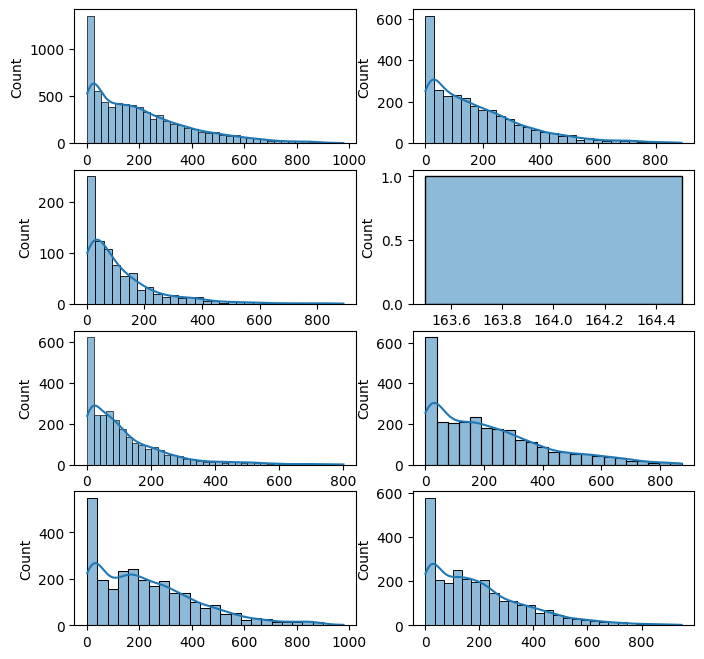

In [ ]:
fig, axis = plt.subplots(nrows=4, ncols=2, figsize=(8, 8))

index = 0
for row in range(4):
    for col in range(2):
        sns.histplot(groups[index], ax=axis[row, col], kde=True)
        index += 1

plt.show()

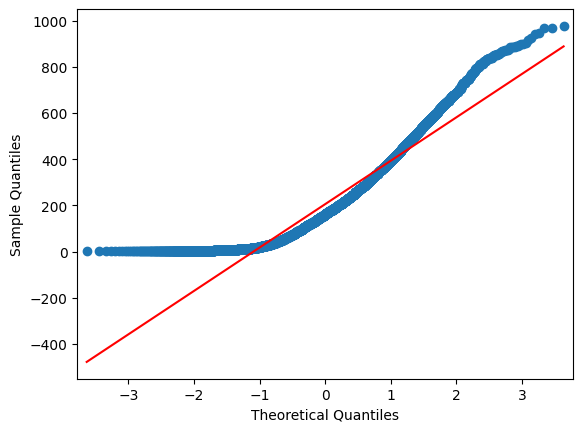

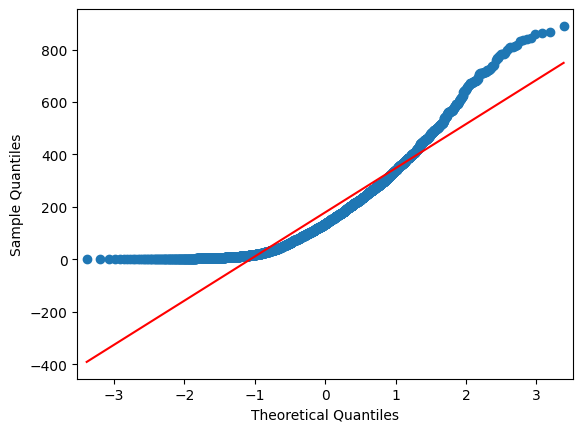

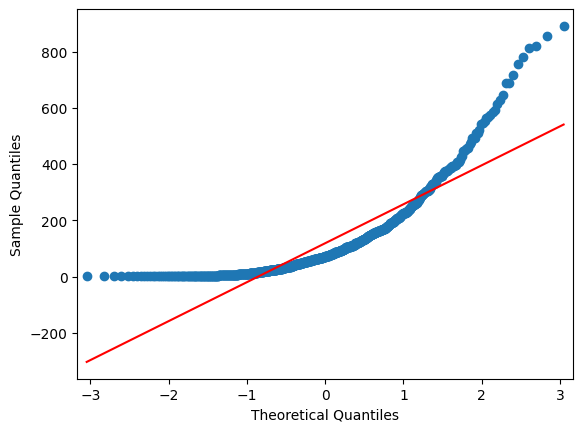

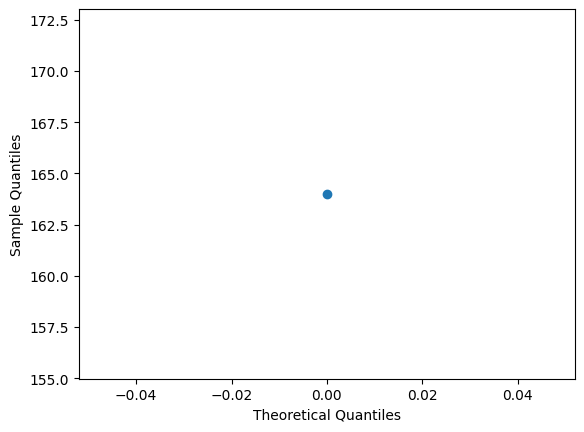

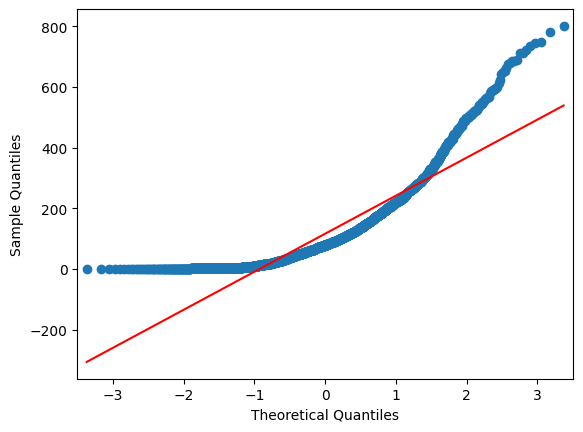

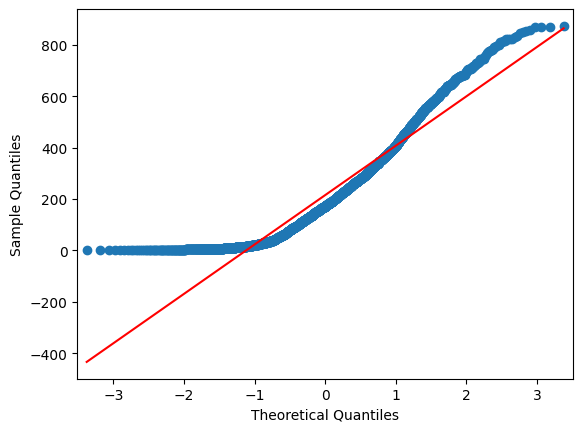

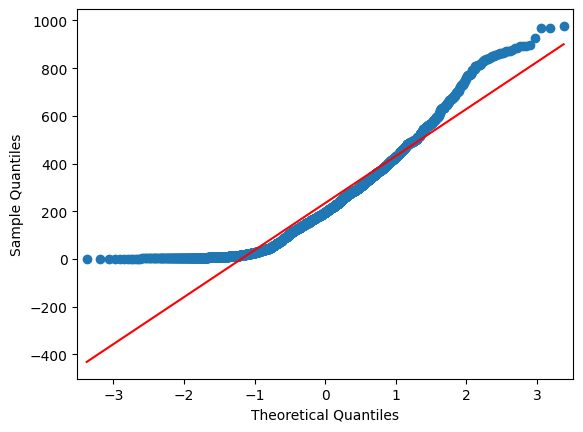

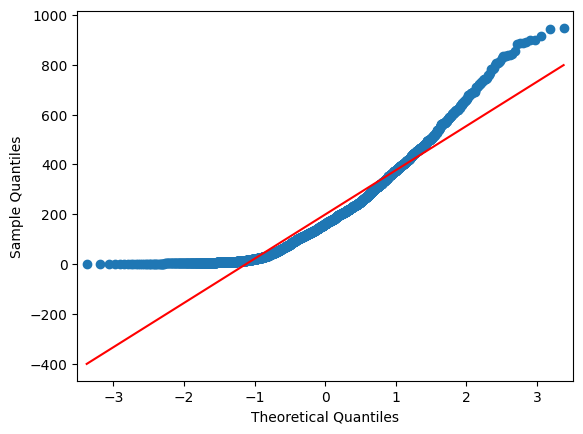

In [ ]:
index = 0
for row in range(4):
    for col in range(2):
        qqplot(groups[index], line="s")
        index += 1

plt.show()

As per above graphs, all groups are not following Gaussian distribution

Data is Independent

Equal variance: Levene's Test

    Null Hypothesis: Variances is similar in different weather and season.

    Alternate Hypothesis: Variances is not similar in different weather and season.

    Significance level (alpha): 0.05

In [ ]:
levene_stat, p_value = stats.levene(gp1,gp2,gp3,gp4,gp5,gp6,gp7,gp8)
print(p_value)
if p_value < 0.05:
    print("Reject the Null hypothesis")
    print("Variances are not equal")
else:
  print("Fail to Reject the Null hypothesis. Variances are  equal")

3.463531888897594e-148
Reject the Null hypothesis
Variances are not equal


    p_value: 3.463531888897594e-148

Reject the Null hypothesis. Variances are not equal

As per QQ plot and Levene's Test, We cannot ANOVA Test.

Assumptions of ANOVA fail, use Kruskal

In [ ]:
kruskal_stat, p_value = stats.kruskal(gp1,gp2,gp3,gp4,gp5,gp6,gp7,gp8)
print("p_value===",p_value)
if p_value<0.05:
  print("Since p-value is less than 0.05, we reject the null hypothesis")

p_value=== 4.614440933900297e-191
Since p-value is less than 0.05, we reject the null hypothesis


    p_value=== 4.614440933900297e-191

Since p-value is less than 0.05, we reject the null hypothesis.

This implies that Number of cycles
rented is not similar in different weather and season conditions

###Check if the Weather conditions are significantly different during different Seasons?###

    Null Hypothesis (H0): Weather is independent of the season

    Alternate Hypothesis (H1): Weather is not independent of the season

    Significance level (alpha): 0.05

In [ ]:
data_table = pd.crosstab(df['season'], df['weather'])
print("Observed values:")
data_table

Observed values:


weather,1,2,3,4
season,,,,
1,1759,715,211,1
2,1801,708,224,0
3,1930,604,199,0
4,1702,807,225,0


In [ ]:
from scipy.stats import chi2_contingency
stat, p, dof, expected = chi2_contingency(data_table)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
 print('Probably independent')
else:
 print('Probably dependent')



stat=49.159, p=0.000
Probably dependent


Since p-value is less than thew 0.05, We reject the Null Hypothesis.

Meaning that Weather is dependent on the season.

## <span><strong>Buisness Insights</strong></span>

> <span><strong>Seasonal Patterns</strong></span>
- Maximum bike rentals occur during summer, while the minimum is observed in winter.

> <span><strong>Conditions Impact</strong></span>
- Clear weather is associated with the highest bike rental counts, whereas rentals sharply decrease in rain, thunderstorm, snow, or fog.
- Humidity, windspeed, temperature and weather are correlated with season and impacts the count of cycles rented.

> <span><strong>Temperature Influence</strong></span>
- Lower temperatures correspond to lower bike rentals, and demand rises with increasing temperatures.

> <span><strong>Time-of-Day Trends</strong></span>
- Bike rentals peak during the day, decline through the night, indicating a pattern fluctuation.

> <span><strong>Holiday and Working Day Dynamics</strong></span>
- Less rentals on holidays and weekends, with a demand increase on non-working days. However, the overall count on working and non-holiday days are similar.

> <span><strong>User Type Behavior</strong></span>
- Casual riders dominate on weekends, while registered users are more active on working days.

> <span><strong>Yearly Growth and User Composition</strong></span>
* The hourly rental count shows impressive annual growth from 2011 to 2012.  
* Approximately 19% of users are casual, and 81% are registered.

> <span><strong>Monthly and Daily Usage Patterns</strong></span>
- Notable seasonal patterns, with peak demand in spring and summer, and a decline in fall and winter.
- January to March sees the lowest rental counts, and a distinctive daily trend shows peak usage during the afternoon.

> <span><strong>Weather Impact on Usage</strong></span>
- Clear and partly_cloudy weather correlates with higher rental counts, while extreme weather conditions have limited data representation.

> <span><strong>Statistical Significance</strong></span>
- ANOVA tests confirm statistically significant impacts of seasons and weather on bike rentals.
- Working days vs. holidays have limited impact according to a 2-sample t-test.
- ChiSquare confirms that the Weather is dependent on the Seasons.

## <span style="color:lime"><strong>Business Recommendations</strong></span>

> <span><strong>Strategic Seasonal Marketing</strong></span>
* Leverage seasonal patterns by implementing targeted marketing during peak seasons (spring and summer).
* Introduce seasonal incentives and exclusive packages to drive higher demand.

> <span><strong>Dynamic Time-based Pricing</strong></span>
* Optimize resource utilization by implementing dynamic time-based pricing.
* Adjust rental rates to encourage bike usage during off-peak hours, enhancing accessibility.

> <span><strong>Weather-sensitive Promotions</strong></span>
* Launch weather-specific promotional campaigns focusing on clear and partly cloudy conditions.
* Introduce weather-based discounts to attract more users during favorable weather.

> <span><strong>User-Centric Segmentation</strong></span>
* Tailor marketing strategies for registered and casual users.
* Offer loyalty programs and personalized incentives for registered users, highlighting occasional use benefits for casual users.

> <span><strong>Optimized Inventory Management</strong></span>
* Fine-tune inventory levels based on monthly demand patterns.
* Avoid overstocking during low-demand months and ensure sufficient bikes during peak periods.

> <span><strong>Customer Comfort and Convenience</strong></span>
* Provide amenities like umbrellas or rain jackets to enhance customer comfort.
* Elevate the overall biking experience, contributing to positive customer feedback.

> <span><strong>Collaboration with Weather Services</strong></span>
* Partner with weather services for real-time updates in marketing campaigns.
* Showcase ideal biking conditions through app integration, appealing to weather-specific preferences.

> <span><strong>Strategic Social Media Marketings</strong></span>
* Utilize social media platforms for strategic promotions and engagement.
* Share diverse biking experiences, customer testimonials, and run targeted advertising campaigns.
